In [15]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [16]:
import random
import cv2

"""이미지 증강 함수"""

def image_augmentation(len_categories, files, index, limit, image_width, image_height):
    random_num = []
    X_array =[]
    y_array = []
    images = []
    data = []
    label = [0 for i in range(len_categories)]
    label[index] = 1
    
    
    
    while len(X_array) <= limit:
        try:
            while True:
                i = random.randrange(len(files))
                if i not in random_num:
                    break
            random_num.append(i)

            file = files[i]
            
            
            img = data_generator(file, image_width, image_height)

            images.append(img)
            images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
            images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
            
            for image in images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(label)
                if len(X_array) >= limit:
                    break
        
        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
            #             remove(f)
        pass 
    

    
    return X_array, y_array

In [17]:
import random

"""이미지 뽑기 함수"""

def image_selector(len_categories, files, index, limit, image_width, image_height):
    random_files = []
    random_num = []
    X_array = []
    y_array = []
    data = []
    label = [0 for i in range(len_categories)]
    label[index] = 1
        
    while len(random_num) <= limit:
        rand = random.randrange(len(files))
        if rand not in random_num:
            random_num.append(rand)
            random_files.append(files[rand])
    
    #print('랜덤 파일')
    #print(random_files)
    #print('다음')
    
    for i, f in enumerate(random_files):
        try:
            
            img = data_generator(f, image_width, image_height)

            data = np.asarray(img)
            #Y는 0 아니면 1이니까 index값으로 넣는다.

            X_array.append(data)
            y_array.append(label)

        except Exception as e:
            print(e)
            print(str(i)+" 번째에서 에러 ")
    #             remove(f)
            pass 
            
    return X_array, y_array

In [18]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))   
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
            print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [19]:
#본 코드 시작

import cv2
import os, glob
from os import remove
import numpy as np

img_dir = './multi_cnn/train'
#categories = os.listdir(img_dir)
categories = ['bill', 'coin', 'general_product', 'graph', 'human', 'lotto_N',
             'lotto_P', 'microbe', 'photoshop', 'non_ad']

sum = 0
ad_index = 0
non_ad_index = 1
size = 100
image_width, image_height = size, size

# file_directory = []
file_list_index = []
img_limit_list = []
X = []
y = []


np_classes = len(categories)    
print(categories)

for i, category in enumerate(categories):
    file_directory = []
    img_dir_detail = os.path.join(img_dir, category)
        
    img_limit = 184
        
    is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)
    
    for directory in file_directory:
        file_list_index.append([i, directory])
    
print(file_list_index)

for lst in file_list_index:
    print(lst[0])

count = 0

for index, directory in file_list_index:
    print(directory)
    files = glob.glob(directory + "/*.jpg")
    len_file = len(files)

    img_limit = img_limit_list[count]

    if len_file <img_limit:
        X_temp, y_temp = image_augmentation(np_classes, files, index, img_limit, image_width, image_height)
    else:
        X_temp, y_temp = image_selector(np_classes, files, index, img_limit, image_width, image_height)

    X = X + X_temp
    y = y + y_temp

    len_file = len(X_temp)
    print(directory + '파일 길이 : ' + str(len_file))
    sum += len_file
    count += 1
        
    
print('총 파일 길이 : ' + str(sum))

X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

"""이미지 크기 인자를 조절하면서 적용"""

['bill', 'coin', 'general_product', 'graph', 'human', 'lotto_N', 'lotto_P', 'microbe', 'photoshop', 'non_ad']
./multi_cnn/train\bill img limit : 184
./multi_cnn/train\coin img limit : 184
./multi_cnn/train\general_product img limit : 184
./multi_cnn/train\graph img limit : 184
./multi_cnn/train\human img limit : 184
./multi_cnn/train\lotto_N img limit : 184
./multi_cnn/train\lotto_P img limit : 184
./multi_cnn/train\microbe img limit : 184
./multi_cnn/train\photoshop img limit : 184
./multi_cnn/train\non_ad img limit : 184
[[0, './multi_cnn/train\\bill'], [1, './multi_cnn/train\\coin'], [2, './multi_cnn/train\\general_product'], [3, './multi_cnn/train\\graph'], [4, './multi_cnn/train\\human'], [5, './multi_cnn/train\\lotto_N'], [6, './multi_cnn/train\\lotto_P'], [7, './multi_cnn/train\\microbe'], [8, './multi_cnn/train\\photoshop'], [9, './multi_cnn/train\\non_ad']]
0
1
2
3
4
5
6
7
8
9
./multi_cnn/train\bill
./multi_cnn/train\bill파일 길이 : 185
./multi_cnn/train\coin
./multi_cnn/train\coi

'이미지 크기 인자를 조절하면서 적용'

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)

print(X_train.shape)
print(X_train.shape[0])
print(y_train.shape)
print(y_test.shape)

(1386, 100, 100, 3)
1386
(1386, 10)
(462, 10)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [22]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [23]:
# import os
import keras.backend.tensorflow_backend as K

from tensorflow.keras import optimizers

lrate = 0.01
dr = 0.1
op = optimizers.Adagrad(lr=lrate)
#op = 'rmsprop'

with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(dr))

    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(dr))
    

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dr))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dr))
    model.add(BatchNormalization())

    #model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    #model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
    #model.add(Dropout(dr))
    #model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(dr))
    model.add(Dense(np_classes, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 50, 50, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
__________

In [25]:
batch = 32
epoch = 40

history = model.fit(X_train, y_train, batch_size=batch, epochs=epoch, validation_split=0.15, verbose=1)

Train on 1178 samples, validate on 208 samples
Epoch 1/40
1178/1178 [==============================] - 4s 4ms/sample - loss: 6.2373 - acc: 0.1715 - val_loss: 9.3775 - val_acc: 0.1490
Epoch 2/40
1178/1178 [==============================] - 1s 1ms/sample - loss: 1.7913 - acc: 0.3896 - val_loss: 2.6796 - val_acc: 0.1683
Epoch 3/40
1178/1178 [==============================] - 1s 1ms/sample - loss: 1.3848 - acc: 0.5195 - val_loss: 2.5696 - val_acc: 0.1827
Epoch 4/40
1178/1178 [==============================] - 1s 1ms/sample - loss: 1.1005 - acc: 0.6392 - val_loss: 2.7952 - val_acc: 0.1971
Epoch 5/40
1178/1178 [==============================] - 1s 1ms/sample - loss: 0.8989 - acc: 0.6995 - val_loss: 2.7310 - val_acc: 0.1058
Epoch 6/40
1178/1178 [==============================] - 1s 1ms/sample - loss: 0.6562 - acc: 0.7827 - val_loss: 2.6648 - val_acc: 0.1731
Epoch 7/40
1178/1178 [==============================] - 1s 1ms/sample - loss: 0.5503 - acc: 0.8243 - val_loss: 2.8745 - val_acc: 0.2308
E

In [26]:
"""수정 필요한 부분"""

model.save('./multi_cnn/models/size/multi_model_saved' + str(size) + '.h5')

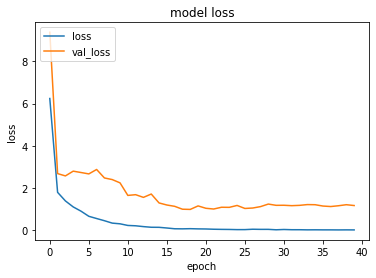

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

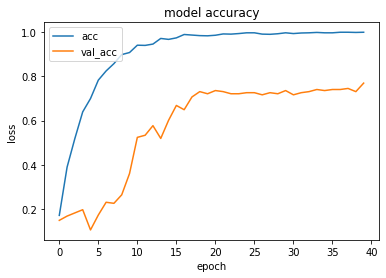

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'] )
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()